# Анализ продаж интернет-магазина «Стримчик». Выявление закономерностей для успешного планирования. 

## Обзор файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

games = pd.read_csv('games.csv')

In [2]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Названия столбцов приведем к единому нижнему регистру:

In [5]:
games.set_axis(['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating'],axis='columns',inplace=True)

посмотрим наличие незаполненных значений:

In [6]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
games.sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
9134,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,0.00,0.00,0.14,0.00,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


269 записей, пропущенные в колонке year_of_release 1,6% от общего количества, можно удалить, а также 2 записи без наименования, по которым практически нет никакой информации

In [8]:
games = games.query('year_of_release.notna() and name.notna()')


In [9]:
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

 в rating заполним пропущенные значения

In [10]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
games['rating'] = games['rating'].fillna('unknown') 

Столбец Год релиза переведем в int,чтобы удобнее было с ним работать

In [12]:
games['year_of_release'] = games['year_of_release'].astype(int)


В user_score переведем текстовые значения 'tbd' в ранг неопределенных, остальные значения в числовые

In [13]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')
games['user_score'] = games['user_score'].astype(float) 

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int32
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


посмотрим какие есть типы, нет ли синонимов.

In [15]:
list_genre = games['genre'].unique()

Для общего ознакомления платформы:

In [16]:
 games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Рузюме: При просмотре файла обнаружились пропущенные значения, часть  строк с ними была удалена как не влияющие на результат в силу малости от общего объема, другие были заполнены подходящими по смыслу и типу значениями. Для удобства работы для некоторх колонок был изменен тип. Колонки с оценками были оставлены без изменения, чтобы не исказить предстящий статистический анализ.



Предлагается такой план дальнейшего  анализа. Сравним "успешный" период с аналогичным текущим, а затем по последним 1-2 года выстроим план на будущий год.




## Анализ. Выбор  "успешного"  периода.

Задание:Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [17]:
sum_regions_sales = games[['na_sales','eu_sales','jp_sales','other_sales']].sum()
sum_regions_sales

na_sales       4341.42
eu_sales       2399.68
jp_sales       1290.64
other_sales     782.63
dtype: float64

Cколько игр выпускалось в разные годы? Для наглядности посмотрим графически:

Text(0, 0.5, 'количество')

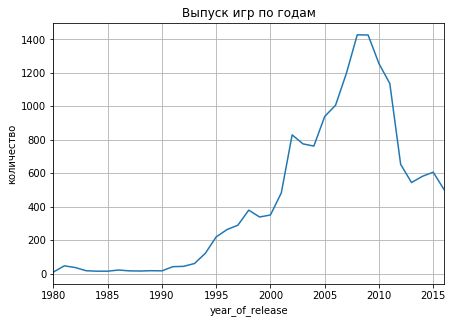

In [18]:
games.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(7,4.8)).set_title('Выпуск игр по годам')
plt.ylabel('количество')

как менялись продажи по платформам? Добавим колонку для суммарных продаж, отберем топ 7 платформ с максимальными суммами :

In [19]:
games['sales'] =games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

In [20]:
top7 = games.groupby(['platform'])['na_sales','eu_sales','jp_sales','other_sales','sales'].sum().sort_values(by='sales',ascending = False ).reset_index().head(7)
top7

,platform,na_sales,eu_sales,jp_sales,other_sales,sales
0,PS2,572.92,332.63,137.54,190.47,1233.56
1,X360,595.74,268.32,12.30,84.88,961.24
2,PS3,390.13,327.21,79.41,134.59,931.34
3,Wii,486.87,258.32,68.28,77.71,891.18
4,DS,380.31,188.41,175.02,59.04,802.78
5,PS,334.72,212.39,139.78,40.69,727.58
6,PS4,108.74,141.09,15.96,48.35,314.14


In [21]:
top7_platform = top7.loc[:,'platform']
top7_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
Name: platform, dtype: object

По этому срезу(максимальных продаж) создадим сводную таблицу продаж по годам и посмотрим графически: 

In [22]:
top_sales = games.groupby(['year_of_release','platform'])['na_sales','eu_sales','jp_sales','other_sales','sales'].sum().sort_values(by='sales',ascending= False)\
.reset_index().query('platform in @top7_platform')

In [23]:
top_sales_gr = top_sales.pivot_table(index = 'year_of_release',columns =['platform'],aggfunc = {'sales':'sum'})
top_sales_gr.columns = ['ds','ps','ps2','ps3','ps4','wii','x360']
top_sales_gr = top_sales_gr.fillna(0)
top_sales_gr

,ds,ps,ps2,ps3,ps4,wii,x360
year_of_release,,,,,,,
1985,0.02,0.00,0.00,0.00,0.00,0.00,0.00
1994,0.00,6.03,0.00,0.00,0.00,0.00,0.00
1995,0.00,35.96,0.00,0.00,0.00,0.00,0.00
1996,0.00,94.70,0.00,0.00,0.00,0.00,0.00
1997,0.00,136.17,0.00,0.00,0.00,0.00,0.00
1998,0.00,169.49,0.00,0.00,0.00,0.00,0.00
1999,0.00,144.53,0.00,0.00,0.00,0.00,0.00
2000,0.00,96.37,39.17,0.00,0.00,0.00,0.00
2001,0.00,35.59,166.43,0.00,0.00,0.00,0.00


Text(0, 0.5, 'млн копий')

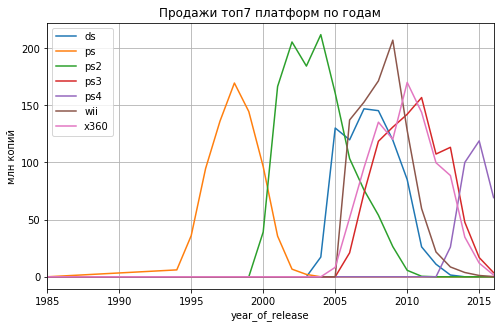

In [24]:
top_sales_gr.plot(grid = True, figsize = (8,4.9)).set_title('Продажи топ7 платформ по годам')
plt.ylabel('млн копий')

По этому графику видно, что продажи по платформам в большинстве случаев переживают резкий короткий взлет максимальных продаж (ps,wii,ps4) и резкий спуск где-то в течение года. А другие, хоть и не достигают max продаж, по сравнению с лидерами, удерживают свой уровень в течение нескольких лет(ds,ps3,x360). ps2 совмещает обе эти тенденции, и 2000-2005 был абсолютным лидером на "безрыбьи", не имея конкурентов.

Посмотрим суммарные продажи по годам:

Text(0, 0.5, 'млн копий')

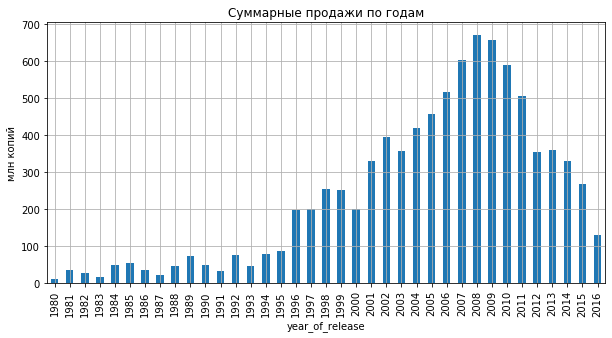

In [25]:
games.groupby('year_of_release')['sales'].sum().plot(kind='bar', grid=True, figsize=(10,4.8)).set_title('Суммарные продажи по годам')
plt.ylabel('млн копий')

То же самое по нашему топу:

Text(0, 0.5, 'млн копий')

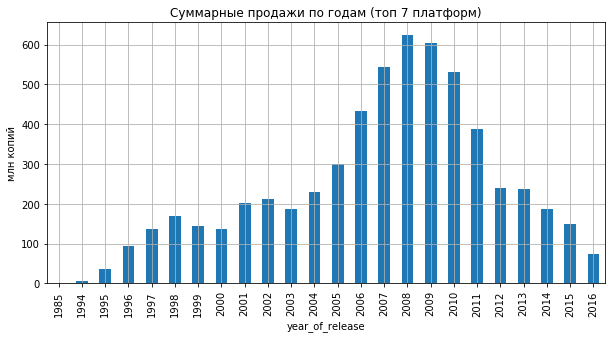

In [26]:
top_sales.groupby('year_of_release')['sales'].sum().plot(kind='bar', grid=True, figsize=(10,4.8)).set_title('Суммарные продажи по годам (топ 7 платформ)')
plt.ylabel('млн копий')

Картинки практически совпадают, по графикам видно, что max продажи были в 2007 - 2010гг, их выберем за "успешный" период.

## Исследование продаж в "успешном " периоде

Для исследования возьмем срез за выбранные 2007-10гг:

In [27]:
games7_10 = games.query('2006 < year_of_release < 2011') 
games7_10

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,unknown,0.01


Проведем на этой вырезке те же действия, как на общей, для ознакомления и выявления потенциально прибыльных платформ.

Text(0, 0.5, 'количество')

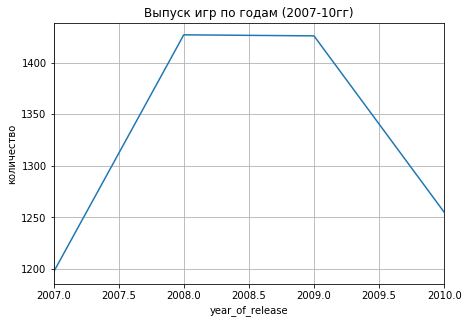

In [28]:
games7_10.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(7,4.8)).set_title('Выпуск игр по годам (2007-10гг)')
plt.ylabel('количество')

In [29]:
games7_10['platform'].unique()

array(['Wii', 'X360', 'DS', 'PS3', 'PC', 'PSP', 'PS2', 'GBA', 'XB', 'GC',
       'DC'], dtype=object)

In [30]:
top5 = games7_10.groupby(['platform'])['na_sales','eu_sales','jp_sales','other_sales','sales'].sum().sort_values(by='sales',ascending = False ).reset_index().head(5)
top5

,platform,na_sales,eu_sales,jp_sales,other_sales,sales
0,Wii,367.45,185.10,50.16,56.30,659.01
1,X360,326.88,139.95,7.47,46.69,520.99
2,DS,255.12,110.68,94.89,36.12,496.81
3,PS3,213.03,156.73,28.94,66.11,464.81
4,PS2,64.83,24.54,18.20,54.36,161.93


In [31]:
top5_platform = top5.loc[:,'platform']
top5_platform

0     Wii
1    X360
2      DS
3     PS3
4     PS2
Name: platform, dtype: object

In [32]:
top7_10_sales = games7_10.groupby(['year_of_release','platform'])['na_sales','eu_sales','jp_sales','other_sales','sales'].sum().sort_values(by='sales',ascending= False)\
.reset_index().query('platform in @top5_platform')

In [33]:
top7_10_sales_gr = top7_10_sales.pivot_table(index = 'year_of_release',columns =['platform'],aggfunc = {'sales':'sum'})
top7_10_sales_gr.columns = ['ds','ps2','ps3','wii','x360']
top7_10_sales_gr = top7_10_sales_gr.fillna(0)
top7_10_sales_gr

,ds,ps2,ps3,wii,x360
year_of_release,,,,,
2007,146.94,75.99,73.19,152.77,95.41
2008,145.31,53.90,118.52,171.32,135.26
2009,119.54,26.40,130.93,206.97,120.29
2010,85.02,5.64,142.17,127.95,170.03


Text(0, 0.5, 'количество')

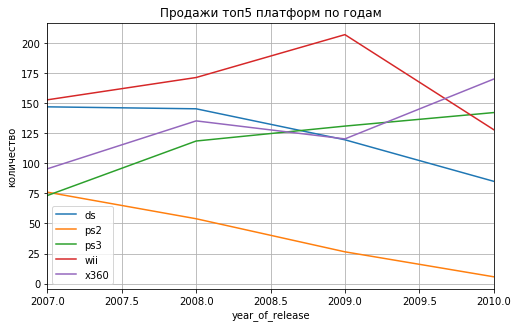

In [34]:
top7_10_sales_gr.plot(grid = True, figsize = (8,4.9)).set_title('Продажи топ5 платформ по годам')
plt.ylabel('количество')

Вернувшись к табличке, где мы определяли топ5 платформ, отметим 3х лидеров: wii, x360, ds. Посмотрим их движение на графике. wii имеет пик продаж в данном интервале, но теперь идет на спуск, х360 наращивает продажи, ds плавно снижает свой потенциал, в то время как ps3 также плавно его наращивает. 

Задание:Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'млн копий')

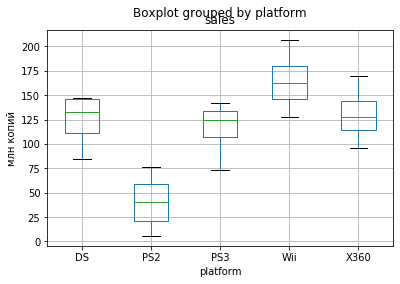

In [35]:
top7_10_sales.boxplot('sales', by='platform')
plt.ylabel('млн копий')

По графику с ящиками видно приблизительный уровень средних продаж, их распределение соответствует линиям графика выше.

Задание: Диаграмма рассеяния: смотрим срезы по платформам и корреляцию влияния отзывов на продажи

In [36]:
games_tt = games7_10.query('platform == "Wii"').dropna(subset=['critic_score'])
games_tt

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...
15343,Balls of Fury,Wii,2007,Sports,0.02,0.00,0.00,0.00,19.0,2.8,E10+,0.02
15544,Ten Pin Alley 2,Wii,2008,Sports,0.02,0.00,0.00,0.00,30.0,NaN,E,0.02
15721,Emergency Mayhem,Wii,2008,Racing,0.02,0.00,0.00,0.00,40.0,4.3,T,0.02
15924,Pirates PlundArrr,Wii,2010,Action,0.02,0.00,0.00,0.00,60.0,NaN,E10+,0.02


In [37]:
games_wii = games7_10.query('platform == "Wii"')
games_wii

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16589,Bomberman,Wii,2008,Puzzle,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16626,The Ultimate Battle of the Sexes,Wii,2010,Misc,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16664,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Text(0.5, 1.0, 'Зависимость продаж от отзывов критиков')

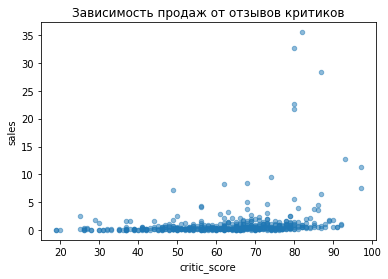

In [38]:
games_tt.plot(x='critic_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов критиков')

Text(0.5, 1.0, 'Зависимость продаж от отзывов критиков')

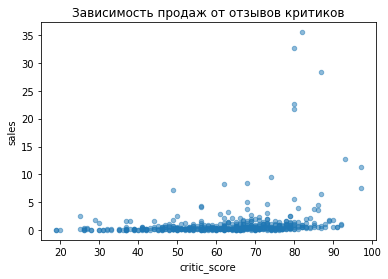

In [39]:
games_wii.plot(x='critic_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов критиков')

In [40]:
games_wii['sales'].corr(games_wii['critic_score'])

0.2372714758766177

Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей')

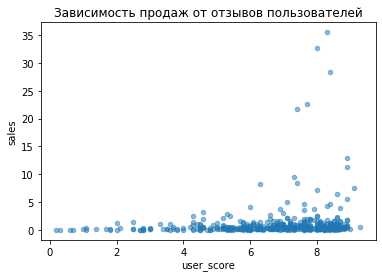

In [41]:
games_wii.plot(x='user_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов пользователей')

In [42]:
games_wii['sales'].corr(games_wii['user_score'])

0.1425697133176696

На примере платформы с max продажами в выбранном периоде Wii видно, что корреляция отзывов с продажами прослеживается, хотя не очень большая, причем профессиональным критикам доверяют больше - 23.7% против 14.3% простых пользователей. Хотя мы не можем утверждать, что высокие оценки критиками приводят к высоким продажам игр. Тем не менее оценка критика может влиять на принятие решения какую выбрать игру.

In [43]:
games_x360 = games7_10.query('platform == "X360"')
games_x360 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47
44,Halo 3,X360,2007,Shooter,7.97,2.81,0.13,1.21,94.0,7.8,M,12.12
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...
16466,Cross Edge Dash,X360,2009,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16474,John Daly's ProStroke Golf,X360,2010,Sports,0.01,0.00,0.00,0.00,57.0,NaN,E,0.01
16505,Time Leap,X360,2009,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16550,Superstars V8 Racing,X360,2009,Racing,0.00,0.01,0.00,0.00,62.0,NaN,E,0.01


Text(0.5, 1.0, 'Зависимость продаж от отзывов критиков')

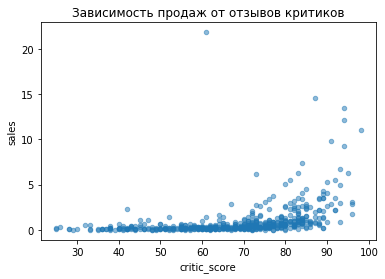

In [44]:
games_x360.plot(x='critic_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов критиков')

In [45]:
games_x360['sales'].corr(games_x360['critic_score'])

0.4000244228485472

In [46]:
games_x360['sales'].corr(games_x360['user_score'])

0.17664372977571943

Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей')

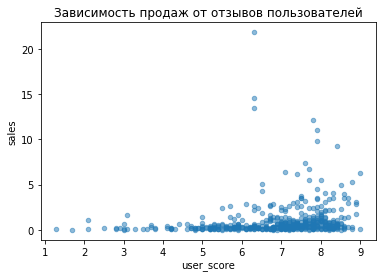

In [47]:
games_x360.plot(x='user_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов пользователей')

In [48]:
games_ps3 = games7_10.query('platform == "PS3"')
games_ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
55,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M,10.61
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
120,Call of Duty 4: Modern Warfare,PS3,2007,Shooter,3.11,2.26,0.28,1.03,94.0,8.4,M,6.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16222,SBK09 Superbike World Championship,PS3,2009,Racing,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16283,Toro to Morimori,PS3,2009,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16360,Makai Senki Disgaea 3 Append Disc: Raspberyl-h...,PS3,2009,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16639,WSC REAL 09: World Snooker Championship,PS3,2009,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01


Text(0.5, 1.0, 'Зависимость продаж от отзывов критиков')

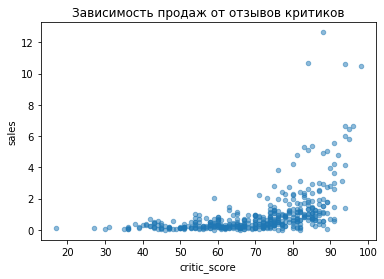

In [49]:
games_ps3.plot(x='critic_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов критиков')

In [50]:
games_ps3['sales'].corr(games_ps3['critic_score'])

0.49489281499507654

In [51]:
games_ps3['sales'].corr(games_ps3['user_score'])

0.2713016869278131

Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей')

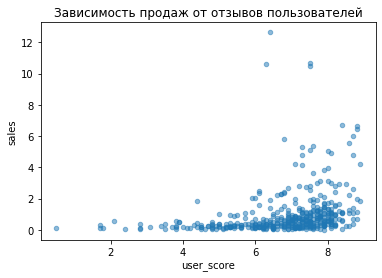

In [52]:
games_ps3.plot(x='user_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов пользователей')

Посмотрим распределение по жанрам

In [53]:
genres7_10 = games7_10.groupby('genre').agg({'sales':['count', 'sum', 'mean','median']})
genres7_10.columns =['count','sum','mean','median'] 
genres7_10 = genres7_10.sort_values(by='sum',ascending = False)
genres7_10['per_cent'] = genres7_10['count']/len(games7_10)
genres7_10.style.format({'per_cent': '{:.2%}'})

,count,sum,mean,median,per_cent
genre,,,,,
Action,929,492.79,0.530452,0.24,17.51%
Sports,735,420.92,0.57268,0.21,13.85%
Misc,770,348.47,0.452558,0.145,14.51%
Shooter,339,275.89,0.813835,0.21,6.39%
Role-Playing,421,219.4,0.52114,0.14,7.94%
Racing,307,176.88,0.576156,0.19,5.79%
Simulation,413,148.87,0.36046,0.14,7.79%
Platform,164,141.77,0.864451,0.305,3.09%
Fighting,199,99.1,0.49799,0.15,3.75%


## Исследование аналогичного  периода последних годов выборки


Теперь то же посмотрим по концу данной выборки, когда продажи уменьшились, возьмем тоже 4 года

In [54]:
games13_16 = games.query('year_of_release > 2012')
games13_16

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Text(0, 0.5, 'количество')

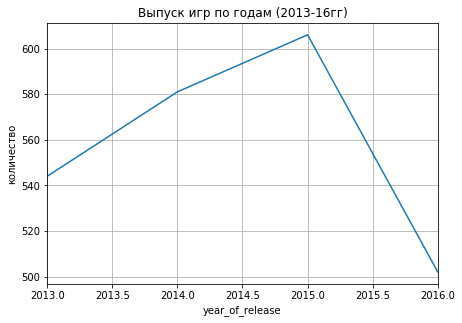

In [55]:
games13_16.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(7,4.8)).set_title('Выпуск игр по годам (2013-16гг)')
plt.ylabel('количество')

In [56]:
games13_16['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [57]:
top5l = games13_16.groupby(['platform'])['na_sales','eu_sales','jp_sales','other_sales','sales'].sum().sort_values(by='sales',ascending = False ).reset_index().head(5)
top5l

,platform,na_sales,eu_sales,jp_sales,other_sales,sales
0,PS4,108.74,141.09,15.96,48.35,314.14
1,PS3,63.50,67.81,23.35,26.77,181.43
2,XOne,93.12,51.59,0.34,14.27,159.32
3,3DS,38.20,30.96,67.81,6.28,143.25
4,X360,81.66,42.52,0.51,12.11,136.80


In [58]:
top5l_platform = top5l.loc[:,'platform']
top5l_platform

0     PS4
1     PS3
2    XOne
3     3DS
4    X360
Name: platform, dtype: object

In [59]:
top13_16_sales = games13_16.groupby(['year_of_release','platform'])['na_sales','eu_sales','jp_sales','other_sales','sales'].sum().sort_values(by='sales',ascending= False)\
.reset_index().query('platform in @top5l_platform')

In [60]:
top13_16_sales_gr = top13_16_sales.pivot_table(index = 'year_of_release',columns =['platform'],aggfunc = {'sales':'sum'})
top13_16_sales_gr.columns = ['3ds','ps3','ps4','x360','xone']
top13_16_sales_gr = top13_16_sales_gr.fillna(0)
top13_16_sales_gr

,3ds,ps3,ps4,x360,xone
year_of_release,,,,,
2013,56.57,113.25,25.99,88.58,18.96
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14
2016,15.14,3.60,69.25,1.52,26.15


Text(0, 0.5, 'количество')

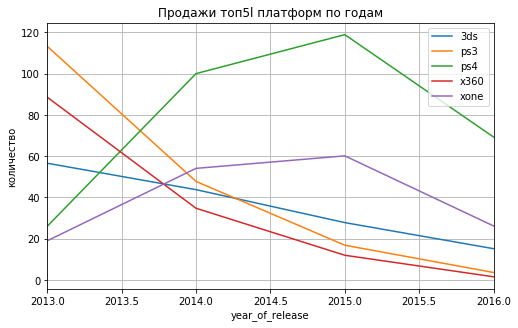

In [61]:
top13_16_sales_gr.plot(grid = True, figsize = (8,4.9)).set_title('Продажи топ5l платформ по годам')
plt.ylabel('количество')

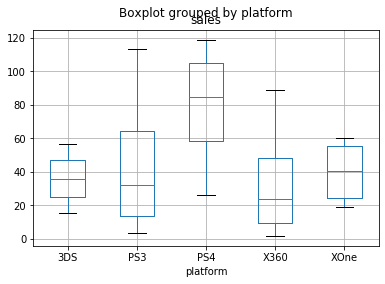

In [62]:
top13_16_sales.boxplot('sales', by='platform')

In [63]:
games_ps4 = games13_16.query('platform == "PS4"')
games_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


Text(0.5, 1.0, 'Зависимость продаж от отзывов критиков')

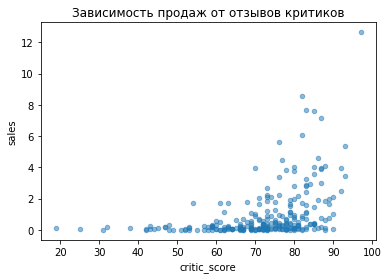

In [64]:
games_ps4.plot(x='critic_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов критиков')

In [65]:
games_ps4['sales'].corr(games_ps4['critic_score'])

0.4065679020617816

In [66]:
games_ps4['sales'].corr(games_ps4['user_score'])

-0.03195711020455643

Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей')

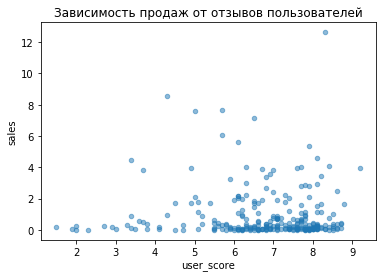

In [67]:
games_ps4.plot(x='user_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов пользователей')

In [68]:
genres13_16 = games13_16.groupby('genre').agg({'sales':['count', 'sum', 'mean','median']})
genres13_16.columns =['count','sum','mean','median'] 
genres13_16 = genres13_16.sort_values(by='count',ascending = False)
genres13_16['per_cent'] = genres13_16['count']/len(games13_16)
genres13_16.style.format({'per_cent': '{:.2%}'})

,count,sum,mean,median,per_cent
genre,,,,,
Action,766,321.87,0.420196,0.11,34.30%
Role-Playing,292,145.89,0.499623,0.125,13.08%
Adventure,245,23.64,0.0964898,0.03,10.97%
Sports,214,150.65,0.703972,0.24,9.58%
Shooter,187,232.98,1.24588,0.45,8.37%
Misc,155,62.82,0.40529,0.1,6.94%
Racing,85,39.89,0.469294,0.12,3.81%
Fighting,80,35.31,0.441375,0.125,3.58%
Platform,74,42.63,0.576081,0.225,3.31%


В целом тенденции сохраняются, как и в предыдущем периоде, так же и даже больше доверяют профессиональным критикам.

## Сравнение двух периодов

В данной задаче предпочтения покупателей можно оценить только по выбору жанра игры. Попробуем сравнить 2 периода.

In [69]:
compare_genres = genres7_10.merge(genres13_16, left_index = True, right_index = True, how='outer')
compare_genres.columns = ['count_10','sum_10','mean_10','median10','per_cent_10','count_16','sum_16','mean_16','median','per_cent_16']
compare_genres['delta16'] = compare_genres['per_cent_16'] / compare_genres['per_cent_10']
compare_genres = compare_genres.sort_values(by='delta16',ascending = False)
compare_genres.style.format({'per_cent_10': '{:.2%}','per_cent_16': '{:.2%}'})

,count_10,sum_10,mean_10,median10,per_cent_10,count_16,sum_16,mean_16,median,per_cent_16,delta16
genre,,,,,,,,,,,
Action,929,492.79,0.530452,0.24,17.51%,766,321.87,0.420196,0.11,34.30%,1.95889
Role-Playing,421,219.4,0.52114,0.14,7.94%,292,145.89,0.499623,0.125,13.08%,1.64777
Shooter,339,275.89,0.813835,0.21,6.39%,187,232.98,1.24588,0.45,8.37%,1.3105
Adventure,542,84.95,0.156734,0.05,10.22%,245,23.64,0.0964898,0.03,10.97%,1.0739
Platform,164,141.77,0.864451,0.305,3.09%,74,42.63,0.576081,0.225,3.31%,1.07197
Fighting,199,99.1,0.49799,0.15,3.75%,80,35.31,0.441375,0.125,3.58%,0.955066
Sports,735,420.92,0.57268,0.21,13.85%,214,150.65,0.703972,0.24,9.58%,0.691708
Racing,307,176.88,0.576156,0.19,5.79%,85,39.89,0.469294,0.12,3.81%,0.657775
Strategy,234,46.83,0.200128,0.08,4.41%,56,10.08,0.18,0.08,2.51%,0.56855


Как мне объяснили, в этом файле предполагается, что в каждом календарном году продаются только релизы текущего года, поэтому возможно, в данном случае сравнение периодов некорректно. Но, тем не менее, я попробовала сравнить продажи по жанрам, в "успешном" периоде и "провальном". В колонке  delta16 отношение процентов покупки определенного жанра 2016 года к  2010 году. По этой колонке видно, что как бы  предпочтения покупателей изменились кардинально. В частности Action купили в 13-16 годах в 2 раза больше, чем в 07-10гг; спрос на Fighting почти не изменился, а 	Puzzle почти перестали покупать. При всем при этом перечень жанров не изменился.

С одной стороны причина  может быть в том , что за 6 лет подросли новые пользователи и у них появились другие предпочтения, с другой стороны, может быть игры выбирали из наличия в магазине, а их товаровед ошибся с заявкой (хотелось бы посмотреть остатки на складе для полноты картины). Или третий вариант, что магазин не уследил за тенденциями и не закупил новые игры на новых платформах, как показывает график выше по играм, если в 07-10 годах количество новых игр стабильно было выше 1400, то в 13-16гг  - небольшой пик чуть выше 600.

Поэтому я считаю, что в рамках этого задания однозначно ответить на этот вопрос невозможно.

## Последние два года.  Планирование на следующий год. 

Для целей планирования возьмем последние 2 года выборки. И проведем манипуляции аналогичным выше.

In [70]:
games2 = games.query('2014 < year_of_release ') 
games2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


Text(0, 0.5, 'количество')

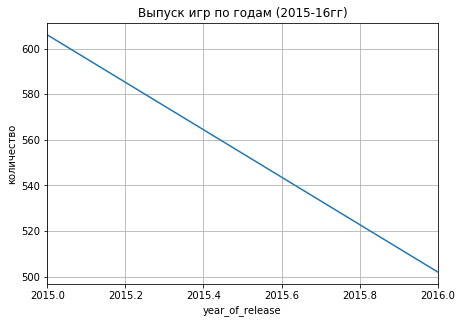

In [71]:
games2.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(7,4.8)).set_title('Выпуск игр по годам (2015-16гг)')
plt.ylabel('количество')

Вообще непонятно, магазин решил распродать все остатки?

In [72]:
games2['platform'].unique()

array(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [73]:
top5_2 = games2.groupby(['platform'])['na_sales','eu_sales','jp_sales','other_sales','sales'].sum().sort_values(by='sales',ascending = False ).reset_index().head(5)
top5_2

,platform,na_sales,eu_sales,jp_sales,other_sales,sales
0,PS4,63.86,83.54,12.05,28.70,188.15
1,XOne,50.30,28.10,0.18,7.71,86.29
2,3DS,10.31,7.39,23.55,1.67,42.92
3,WiiU,8.86,6.49,4.12,1.48,20.95
4,PS3,5.66,7.30,4.97,2.49,20.42


In [74]:
top5_2_platform = top5_2.loc[:,'platform']
top5_2_platform

0     PS4
1    XOne
2     3DS
3    WiiU
4     PS3
Name: platform, dtype: object

In [75]:
top2_sales = games2.groupby(['year_of_release','platform'])['na_sales','eu_sales','jp_sales','other_sales','sales'].sum().sort_values(by='sales',ascending= False)\
.reset_index().query('platform in @top5_2_platform')

In [76]:
top2_sales_gr = top2_sales.pivot_table(index = 'year_of_release',columns =['platform'],aggfunc = {'sales':'sum'})
top2_sales_gr.columns = ['3ds','ps3','ps4','wiiu','xone']
top2_sales_gr = top2_sales_gr.fillna(0)
top2_sales_gr

,3ds,ps3,ps4,wiiu,xone
year_of_release,,,,,
2015,27.78,16.82,118.90,16.35,60.14
2016,15.14,3.60,69.25,4.60,26.15


Text(0, 0.5, 'количество')

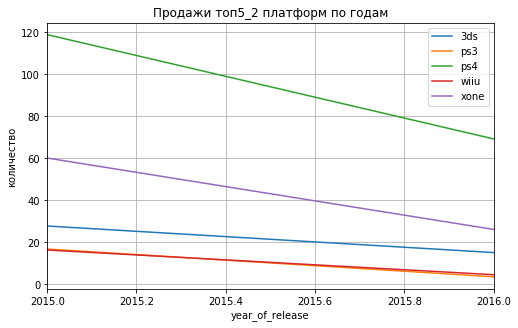

In [77]:
top2_sales_gr.plot(grid = True, figsize = (8,4.9)).set_title('Продажи топ5_2 платформ по годам')
plt.ylabel('количество')

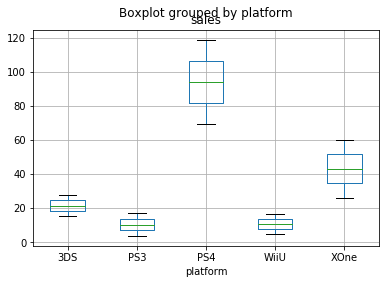

In [78]:
top2_sales.boxplot('sales', by='platform')

По сравнению с предыдущим рассмотренным периодом (4 последних года) тенденции не изменились, но остались только 2 более-менее прибыльные платформы,  и то средние продажи уменьшились.

In [79]:
games_ps4 = games2.query('platform == "PS4"')
games_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


Text(0.5, 1.0, 'Зависимость продаж от отзывов критиков')

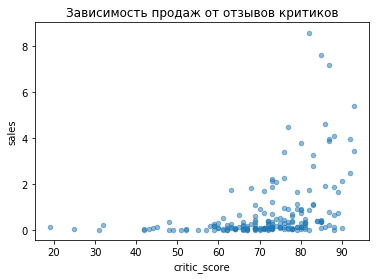

In [80]:
games_ps4.plot(x='critic_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов критиков')

In [81]:
games_ps4['sales'].corr(games_ps4['critic_score'])

0.3928485555130598

In [82]:
games_ps4['sales'].corr(games_ps4['user_score'])

-0.05973845712638211

Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей')

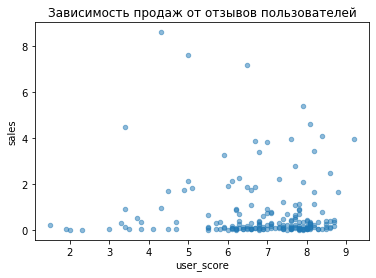

In [83]:
games_ps4.plot(x='user_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов пользователей')

In [84]:
games_xone = games2.query('platform == "XOne"')
games_xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,unknown,3.66
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


Text(0.5, 1.0, 'Зависимость продаж от отзывов критиков')

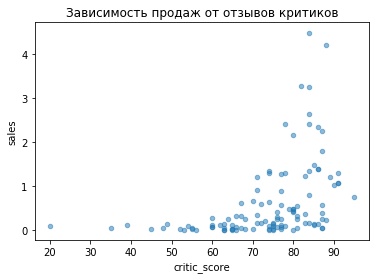

In [85]:
games_xone.plot(x='critic_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов критиков')

In [86]:
games_xone['sales'].corr(games_xone['critic_score'])

0.430888745821368

In [87]:
games_xone['sales'].corr(games_xone['user_score'])

-0.04146733387366271

Text(0.5, 1.0, 'Зависимость продаж от отзывов пользователей')

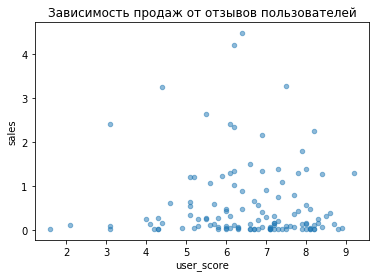

In [88]:
games_xone.plot(x='user_score', y='sales', kind='scatter', alpha = 0.5).set_title('Зависимость продаж от отзывов пользователей')

При анализе этого двухлетнего периода при сравнении с предыдущим 4-летним выяснилось, что тенденция на уменьшение продаж сохраняется, из 10-ти продаваемых платформ только 2 - PS4 и XOne - дают основную прибыль, также подтверждаются небольшая корреляция между отзывами и продажами, причем, как и в предыдущих периодах, отзывы профессиональных критиков больше влияют на уровень продаж (корреляция выше), чем отзывы пользователей.

## Обзор жанров

Я не считаю себя специалистом по играм, поэтому сделаю небольшую проверку.

In [89]:
games.groupby(['platform','genre']).agg({'sales':['count', 'sum', 'mean']}).head(30)

sales                 
                      count    sum      mean
platform genre                              
2600     Action          55  26.31  0.478364
         Adventure        1   0.40  0.400000
         Fighting         1   0.77  0.770000
         Misc             5   3.57  0.714000
         Platform         9  13.26  1.473333
         Puzzle           8  13.67  1.708750
         Racing           4   2.32  0.580000
         Shooter         22  22.96  1.043636
         Simulation       1   0.44  0.440000
         Sports          10   2.78  0.278000
3DO      Adventure        1   0.06  0.060000
         Puzzle           1   0.02  0.020000
         Simulation       1   0.02  0.020000
3DS      Action         187  57.84  0.309305
         Adventure       37   4.83  0.130541
         Fighting        14  10.56  0.754286
         Misc            54  10.99  0.203519
         Platform        28  32.53  1.161786
         Puzzle          20   5.57  0.278500
         Racing          10  14.87  1.487000
         Role-Playing    87  84.20  0.967816
         Shooter          6   1.22  0.203333
         Simulation      29  26.96  0.929655
         Sports          25   6.15  0.246000
         Strategy        15   2.09  0.139333
DC       Action           3   1.26  0.420000
         Adventure       11   2.50  0.227273
         Fighting        12   1.83  0.152500
         Platform         2   2.53  1.265000
         Racing           6   2.65  0.441667

Как я и предположила, что на одной платформе могут быть разные жанры, поэтому будем смотреть жанры без привязки к платформам. Смотрим данные за последние 2 года)

In [90]:
genres = games2.groupby(['genre']).agg({'sales':['count', 'sum', 'mean','median']})
genres.columns = ['count','sum','mean','median']
genres = genres.sort_values(by='median',ascending = False)
genres

,count,sum,mean,median
genre,,,,
Shooter,81,105.73,1.305309,0.380
Sports,107,64.33,0.601215,0.120
Role-Playing,132,55.82,0.422879,0.115
Platform,28,9.28,0.331429,0.100
Simulation,33,7.55,0.228788,0.100
Fighting,37,12.37,0.334324,0.090
Action,431,102.13,0.236961,0.060
Misc,71,14.17,0.199577,0.060
Racing,42,10.86,0.258571,0.055


Очень большая разница между средним и медианой, видимо, сказывается разный уровень продаж по регионам, но по этой таблице видно, что  с большим отрывом лидируют "стрелялки". Несмотря на то, что  количественно их продано меньше, чем иных, общая сумма продаж (копий) дает большую прибыль.

Непонятно, как считать прибыль, если sum - это количество копий. Положим, что стоимость одной копии - 1 условный тугрик. Тогда по полученной табличке видно, что средняя (и медианная)  стоимость  игр разных жанров отличается значительно. Объем продаж тоже разный, процент спроса, как мы выяснили ранее, тоже варьируется в разные периоды.

## Портрет пользователя разных регионов

Посмотрим какие платформы более популярны в каждом регионе (за последние 2 года):

In [91]:
top5_na = games2.groupby('platform')['na_sales'].sum().sort_values(ascending = False ).reset_index().head(5)
top5_na

,platform,na_sales
0,PS4,63.86
1,XOne,50.30
2,3DS,10.31
3,WiiU,8.86
4,X360,8.05


In [92]:
top5_eu = games2.groupby('platform')['eu_sales'].sum().sort_values(ascending = False ).reset_index().head(5)
top5_eu

,platform,eu_sales
0,PS4,83.54
1,XOne,28.10
2,PC,9.10
3,3DS,7.39
4,PS3,7.30


In [93]:
top5_jp = games2.groupby('platform')['jp_sales'].sum().sort_values(ascending = False ).reset_index().head(5)
top5_jp

,platform,jp_sales
0,3DS,23.55
1,PS4,12.05
2,PSV,8.41
3,PS3,4.97
4,WiiU,4.12


Выяснилось, что если в Европе и Сев.Америке расхождения только в третьей позиции, а max используются PS4 и XOne, то в Японии PS4 на втором месте, а на первом 3DS, которая в Европе и Америке  на 4-ом и 3-ем местах соответственно.

Посчитаем % продаж в зависимости от рейтинга ESRB по регионам:


In [94]:
rating_esrb =games2.groupby(['rating'])['na_sales','eu_sales','jp_sales'].sum()
rating_esrb['na_sales'] = rating_esrb['na_sales']/rating_esrb['na_sales'].sum()
rating_esrb['eu_sales'] = rating_esrb['eu_sales']/rating_esrb['eu_sales'].sum()
rating_esrb['jp_sales'] = rating_esrb['jp_sales']/rating_esrb['jp_sales'].sum()
rating_esrb.style.format({'na_sales': '{:.2%}','eu_sales': '{:.2%}','jp_sales': '{:.2%}'})

,na_sales,eu_sales,jp_sales
rating,,,
E,17.52%,23.54%,9.83%
E10+,11.77%,7.80%,6.12%
M,30.98%,30.78%,8.03%
T,15.06%,13.74%,14.42%
unknown,24.67%,24.14%,61.59%


Я не знаю, что обозначают эти коды, но по таблице видно, что в Европе и Америке очень похожее распределение по рейтингу, максимально продаются игры, маркированные "M"- 30% и всего 24% без маркировки. В то время как в Японии больше 60% продаются без маркировки, а с маркировкой максимальные продажи 14% с кодом "T". То есть в Европе и Америке как-то ориентируются на эти коды, а в Японии - игнорируют.

Кроме того, пользователей разных регионов по информации в данном файле мы можем сравнить  по предпочтениям жанра игр. Сгруппируем суммы покупок по жанрам для каждого региона, объединим этот с файл с общим файлом жанров, пересчитаем суммы в условное количество единиц игр и переведем все в %%. Увидим распределение покупок в процентах по жанрам для каждого региона.

In [95]:
users = games2.groupby(['genre'])['na_sales','eu_sales','jp_sales'].sum()


In [96]:
users = users.merge(genres, left_index = True, right_index = True, how='outer')
users

,na_sales,eu_sales,jp_sales,count,sum,mean,median
genre,,,,,,,
Action,33.68,34.82,23.05,431,102.13,0.236961,0.060
Adventure,3.84,4.67,2.22,110,11.98,0.108909,0.030
Fighting,5.54,3.72,1.54,37,12.37,0.334324,0.090
Misc,5.58,4.26,3.19,71,14.17,0.199577,0.060
Platform,3.78,3.20,1.42,28,9.28,0.331429,0.100
Puzzle,0.06,0.13,0.52,7,0.72,0.102857,0.030
Racing,2.82,6.52,0.29,42,10.86,0.258571,0.055
Role-Playing,19.82,17.21,13.41,132,55.82,0.422879,0.115
Shooter,48.18,40.28,3.79,81,105.73,1.305309,0.380


In [97]:

users['na_sales'] = users['na_sales']/users['median']
users['na_sales'] = users['na_sales']/users['na_sales'].sum()
users['eu_sales'] = users['eu_sales']/users['median']
users['eu_sales'] = users['eu_sales']/users['eu_sales'].sum()
users['jp_sales'] = users['jp_sales']/users['median']
users['jp_sales'] = users['jp_sales']/users['jp_sales'].sum()
users.loc[:,['na_sales','eu_sales','jp_sales']].style.format({'na_sales': '{:.2%}','eu_sales': '{:.2%}','jp_sales': '{:.2%}'})

,na_sales,eu_sales,jp_sales
genre,,,
Action,37.84%,37.21%,52.43%
Adventure,8.63%,9.98%,10.10%
Fighting,4.15%,2.65%,2.34%
Misc,6.27%,4.55%,7.26%
Platform,2.55%,2.05%,1.94%
Puzzle,0.13%,0.28%,2.37%
Racing,3.46%,7.60%,0.72%
Role-Playing,11.62%,9.60%,15.92%
Shooter,8.55%,6.80%,1.36%


- Портрет пользователя Сев.Америки:
- Популярные платформы: PS4, XOne,3DS
- max рейтинг ESRB: М
- min рейтинг ESRB: E10+
- Жанры max: Action 37.84%, Sports 14.78%, Role-Playing 11.62%
- Жанры min: Puzzle 0.13%	

- Портрет пользователя Европы:
- Популярные платформы: PS4, XOne,PC
- max рейтинг ESRB: М
- min рейтинг ESRB: E10+
- Жанры max: Action 37.21%, Sports 14.87%, Adventure 9.98%
- Жанры min: Puzzle 0.28%	

- Портрет пользователя Японии:
- Популярные платформы: 3DS, PS4,PSV
- max рейтинг ESRB: без рейтинга
- min рейтинг ESRB: E10+
- Жанры max: Action 52.43%, Role-Playing 15.92%, Adventure 10.10%
- Жанры min: Racing 0.72%

То есть  максимальные рейтинги жанров  в разных вариациях почти одинаковые, а далее наблюдаются  отличия. Так Sports 14% в Европе и Америке против 1.88% в Японии; Shooter 8.55% в Америке против 1.36% в Японии; Puzzle 0.13% в Америке против 2.37% в Японии.

## Проверка гипотез

### 1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Это двухсторонняя гипотеза. Нулевая гипотеза формулируется со знаком равенства. Нулевая гипотеза: рейтинги равны. Используем метод scipy.stats_ttest_ind(). Создадим выборки для Xbox One и PC:

In [98]:
r_xone = games2.query('platform == "XOne"')['user_score']
r_pc = games2.query('platform == "PC"')['user_score']


Я не знаю является ли этот файл генеральной совокупностью, поэтому буду считать с ddof=1

In [99]:
var_xone = np.var(r_xone,ddof=1)
var_pc = np.var(r_pc,ddof=1)
var_xone,var_pc

(2.125792011019284, 3.110950946643718)

дисперсии одного порядка equal_var = True

In [100]:
alpha = 0.05
result = st.ttest_ind(r_xone.notna(),r_pc.notna())
result

Ttest_indResult(statistic=-1.5518686114665052, pvalue=0.12186935388592249)

Результат pvalue=0.12186935388592249  больше порогового значения, это не дает оснований отвергруть нулевую гипотезу. Рейтинги могут быть равны.

### 2

Средние пользовательские рейтинги жанров Action и Sports разные

Задача аналогична первой. Нулевая гипотеза рейтинги равны.

In [101]:
r_action = games2.query('genre == "Action"')['user_score']
r_sports = games2.query('genre == "Sports"')['user_score']

In [102]:
var_action = np.var(r_action,ddof=1)
var_sports = np.var(r_sports,ddof=1)
var_action,var_sports

(1.81305591537133, 3.8724676302318572)

In [103]:
alpha = 0.05
result = st.ttest_ind(r_action.notna(),r_sports.notna())
result

Ttest_indResult(statistic=-6.089550472067149, pvalue=2.1609605663662673e-09)

Результат pvalue=2.1609605663662673e-09 почти 0, поэтому однозначно отвергаем нулевую гипотезу. Рейтинги различаются.

## Общий вывод

- В процессе анализа были рассмотрены данные продаж  интернет-магазина «Стримчик» в исторической ретросперктиве.
- На основе данных в предложенном файле был выявлен период наиболее успешных продаж 2007-2010 гг. В этом периоде были выявлены наиболее популярные платформы, приносящие основную прибыль, а также был составлен рейтинг покупок игр по жанрам. В разделе 3 можно ознакомиться с полученными таблицами и графиками.
- Далее аналогичные исследования были проведены для периода (4 года) предшествующему исследованию, где также были получены таблицы и графики (раздел 4)
- В разделе 5 была осуществлена попытка сравнения двух периодов. В связи с тем, что мне не известны все обстоятельства функционирования магазина в эти периоды, это сравнение нельзя считать исчерпывающим. Возможные причины уменьшения продаж изложены мною в этом разделе.
- В разделе 6 был рассмотрен "актуальный" период (2 года) для предстоящего планирования на следующий год. В этом периоде подтвердились тенденции предыдущего более общего четырехлетнего периода на уменьшение продаж.
- В разделе 7 представлена сводная таблица продаж по жанрам, где можно оценить "стоимость" каждого жанра.
- В разделе 8 сформирован портрет среднего пользователя по регионам, что тоже может помочь в планировании.
- Общие выводы. Как показывает сравнение "успешного" и "последнего"(разделы 3 и 4)периодов, в "успешном" периоде было представлено большее разнообразие платформ и игр. А в "последнем" периоде практически не было обновления ассортимента, была добавлена всего одна потенциально прибыльная платформа PS4. Также, возможно, было не учтенено изменение предпочтений по жанрам. И в зависимости от обстоятельств, о которых сказано выше, можно рассмотреть возможную раскладку по жанрам для планирования (таблицы в соответствующих разделах 3,4,5).
- Было выявлено, что в "актуальном" периоде номенклатура предлагаемых к продаже игр уменьшилась до 500 наименований (в 3 раза меньше, чем в "успешном" периоде), поэтому первая очевидная рекомендация: увеличить номенклатуру игр на современных новых платформах с учетом предпочтений пользователей по жанрам.
- Для всех рассмотренных  периодов была выявлена небольшая корреляция продаж с оценками пользователей и критиков. Рекомендуется особенно обратить внимание на приглашение профессиональных критиков для оценки игр.
- Также предлагается принять во внимание предпочтения пользователей в зависитости от региона
